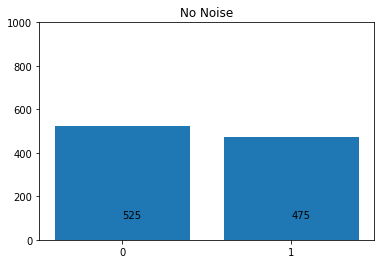

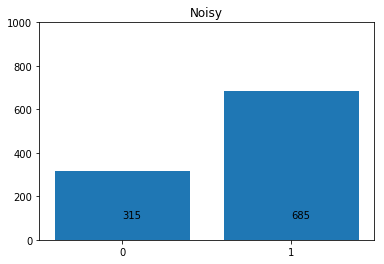

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def run(G, E, vec, n=1000):
    ''' - Computes orthogonal matrix from E, and adds that as noise to the transformation gat G.
        - creates lists of n measures of the non-noisy and noisy transformation'''
    GE, r = np.linalg.qr(G+E)
    #print('orthogonal G+E:\n', GE)

    ideal = np.matmul(G,vec)
    noisy = np.matmul(GE,vec)
    #print('Ideal vec:\n', ideal)
    #print('Noisy vec:\n',noisy)

    m0 = 0 # number of zeros
    for i in range(n):
        prob0 = np.cos(np.arctan(ideal[0]/ideal[1]))**2
        r = np.random.random()
        if prob0 <= r:
            m0 += 1

    m0_noisy = 0
    for i in range(n):
        prob0 = np.cos(np.arctan(noisy[0]/noisy[1]))**2
        r = np.random.random()
        if prob0 <= r:
            m0_noisy += 1
    
    return m0, m0_noisy, n

            
def plot(p0, p0_noisy, n):
    '''Plots two histograms of noisy and non-noisy distributions'''
    
    fig1 = plt.figure()
    p1 = n - p0
    plt.bar([0,1], [p0, p1])
    plt.text(0,n/10,'{}'.format(p0))
    plt.text(1,n/10,'{}'.format(p1))
    plt.ylim(0,n)
    plt.xticks([0,1], [0, 1])
    plt.title("No Noise")
    
    fig2 = plt.figure()
    p1_noisy = n - p0_noisy
    plt.bar([0,1], [p0_noisy, p1_noisy])
    plt.text(0,n/10,'{}'.format(p0_noisy))
    plt.text(1,n/10,'{}'.format(p1_noisy))
    plt.ylim(0,n)
    plt.xticks([0,1], [0,1])
    plt.title("Noisy")
    
########## Main ###########

# input vector
vec = np.array([[1],
                [0]])

# error matrix
E = np.array([[0.1, 0.3],
              [0.5, 0.2]])

# Pauli X
PX = np.array([[0,1],
               [1,0]])

# Hadamard
H = np.array([[1/np.sqrt(2),1/np.sqrt(2)],
              [1/np.sqrt(2),-1/np.sqrt(2)]])

#           Gate, Error, vector, number of trials
p0, p0_noisy, n = run(H, E, vec, 1000)
plot(p0, p0_noisy, n)






In [61]:
'''- Uses Hadamard gate and random values of a and b to produce an array for machine learning.
   - feature_vectors = [a, b, proportion of zeros]
   - with current config, correct proportion of zeros is 0.5'''
vec = np.array([[1],
                [0]])

# Hadamard
H = np.array([[1/np.sqrt(2),1/np.sqrt(2)],
              [1/np.sqrt(2),-1/np.sqrt(2)]])


# Correct ideal proportion of zeros with current gate and vector
ideal = np.matmul(H,vec)
cp0 = (np.cos(np.arctan(ideal[0]/ideal[1]))**2)[0]

n_vectors = 1000
feature_vectors = np.zeros((n_vectors, 3))

for nv in range(n_vectors):
    a = np.random.uniform(-1,1)
    b = np.random.uniform(-1,1)
    E = np.array([[a, b],
                  [b, a]])
    p0, p0_noisy, n = run(H, E, vec, 1000)
    feature_vectors[nv,0] = a
    feature_vectors[nv,1] = b
    feature_vectors[nv,2] = (p0/1000) # proportion we got
    
feature_vectors
    

array([[-0.8887234 ,  0.18986789,  0.509     ],
       [-0.33839491,  0.59282952,  0.493     ],
       [-0.19340142, -0.9158814 ,  0.519     ],
       ...,
       [-0.15077145, -0.01203178,  0.478     ],
       [-0.60808438,  0.47955454,  0.52      ],
       [-0.78894148,  0.71970263,  0.502     ]])

In [47]:
# input vector
vec = np.array([[1],
                [0]])

#vec = np.array([[ 0.70710678],
#               [ -0.70710678]])
# error matrix
E = np.array([[0.1, 0.3],
              [0.5, 0.2]])

# Pauli X
PX = np.array([[0,1],
               [1,0]])

# Hadamard
H = np.array([[1/np.sqrt(2),1/np.sqrt(2)],
              [1/np.sqrt(2),-1/np.sqrt(2)]])

ideal = np.matmul(PX,vec)
print(ideal)
cp0 = (np.sin(np.arctan(ideal[0]/ideal[1]))**2)[0]
print(cp0)

a_list = []
n_list = []
for a in np.arange(0,5,0.1):
    for b in np.arange(0,5,0.1):
        E = np.array([[a, b],
                      [b, a]])
        p0, p0_noisy, n = run(PX, E, vec, 1000)
        n_list.append(p0_noisy)
        a_list.append(a-b)

[[0]
 [1]]
0.0


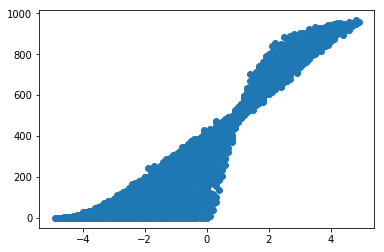

In [48]:
plt.scatter(a_list, n_list)